In [7]:
import sqlite3
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Pregunta 1: ¿Cuál es el ingreso total generado por el negocio?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

total_ventas = pd.read_sql_query("""
    SELECT SUM(precio_total) AS total_ventas FROM tickets
""", conexion)      

print("Ingresos totales: ", total_ventas['total_ventas'][0])

conexion.close                                 

Pregunta 2: ¿Cómo ha sido la tendencia de ingresos mensuales?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

ingresos_mensuales = pd.read_sql_query("""
    SELECT strftime('%Y-%m', fecha) AS mes, 
           SUM(precio_total) AS ingresos_mensuales 
    FROM tickets 
    GROUP BY mes 
    ORDER BY mes
""", conexion)

print(ingresos_mensuales)

conexion.close()

GRÁFICAS

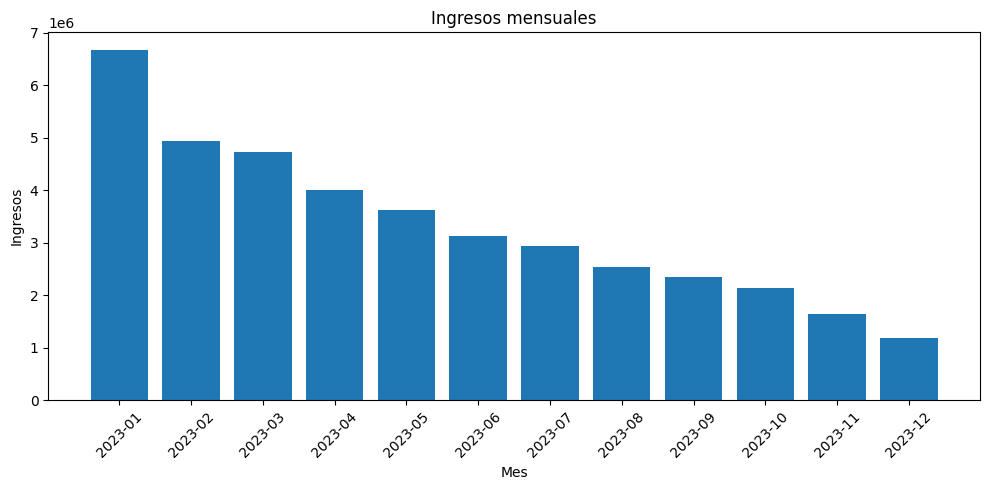

In [ ]:
plt.figure(figsize=(10, 5)) # Crea una figura con tamaño de 10x5 pulgadas
plt.bar(ingresos_mensuales['mes'], ingresos_mensuales['ingresos_mensuales']) # Crea un gráfico de barras usando 'mes' en el eje X e 'ingresos_mensuales' en el eje Y
plt.title("Ingresos mensuales") # Agrega un título al gráfico
plt.xlabel('Mes') # Agrega una etiqueta al eje X
plt.ylabel('Ingresos')  # Agrega una etiqueta al eje Y
plt.xticks(rotation=45) # Rota las etiquetas del eje X 45 grados para mejor visualización
plt.tight_layout()  # Ajusta automáticamente los parámetros de la figura para que todo encaje bien
plt.show()  # Muestra el gráfico en pantalla

Pregunta 3: ¿Cuál es el rendimiento de cada departamento en términos de ventas?

In [ ]:
# Conexión a la base de datos
conexion = sqlite3.connect("./data/sanoyfresco.db")

# Lista de departamentos a consultar
departamentos = [4, 16, 20, 7]

# Diccionario para almacenar los resultados
resultados = {}

for depto in departamentos:
    query = f"""
        SELECT SUM(precio_total) AS total_precio 
        FROM tickets 
        WHERE id_departamento = {depto}
    """
    resultado = pd.read_sql_query(query, conexion)
    resultados[depto] = resultado['total_precio'][0]

for depto, total in resultados.items():
    print(f"Ingresos para el departamento {depto}: {total}")

conexion.close()

GRÁFICAS

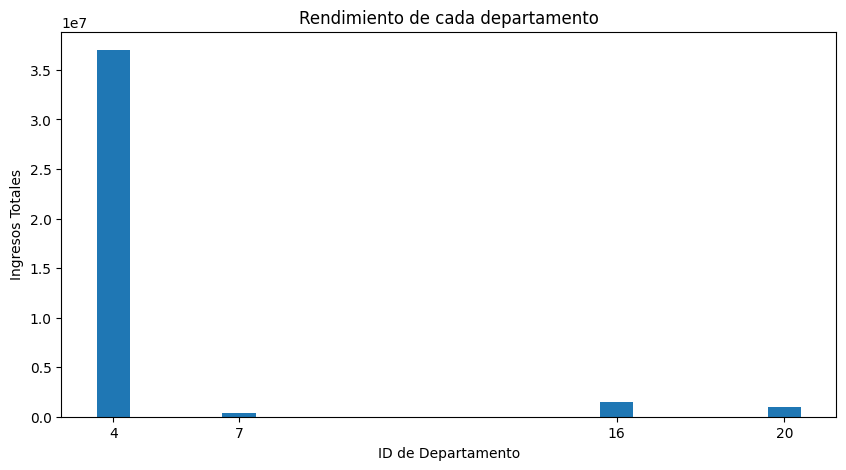

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(list(resultados.keys()), list(resultados.values()))
plt.title("Rendimiento de cada departamento")
plt.xlabel('ID de Departamento')
plt.ylabel('Ingresos Totales')
plt.xticks(departamentos)
plt.show()

Pregunta 4: ¿Cómo se distribuyen las ventas entre las diferentes secciones?

In [ ]:
import sqlite3
import pandas as pd

conexion = sqlite3.connect("./data/sanoyfresco.db")

# Lista de secciones a consultar
secciones = [24, 123, 83, 67, 53, 84, 115, 16]

# Diccionario para almacenar los resultados
resultados = {}

for seccion in secciones:
    query = f"""
        SELECT SUM(precio_total) AS total_precio 
        FROM tickets 
        WHERE id_seccion = {seccion}
    """
    resultado = pd.read_sql_query(query, conexion)
    resultados[seccion] = resultado['total_precio'][0]

for seccion, total in resultados.items():
    print(f"Ingresos para la sección {seccion}: {total}")

conexion.close()


GRÁFICAS

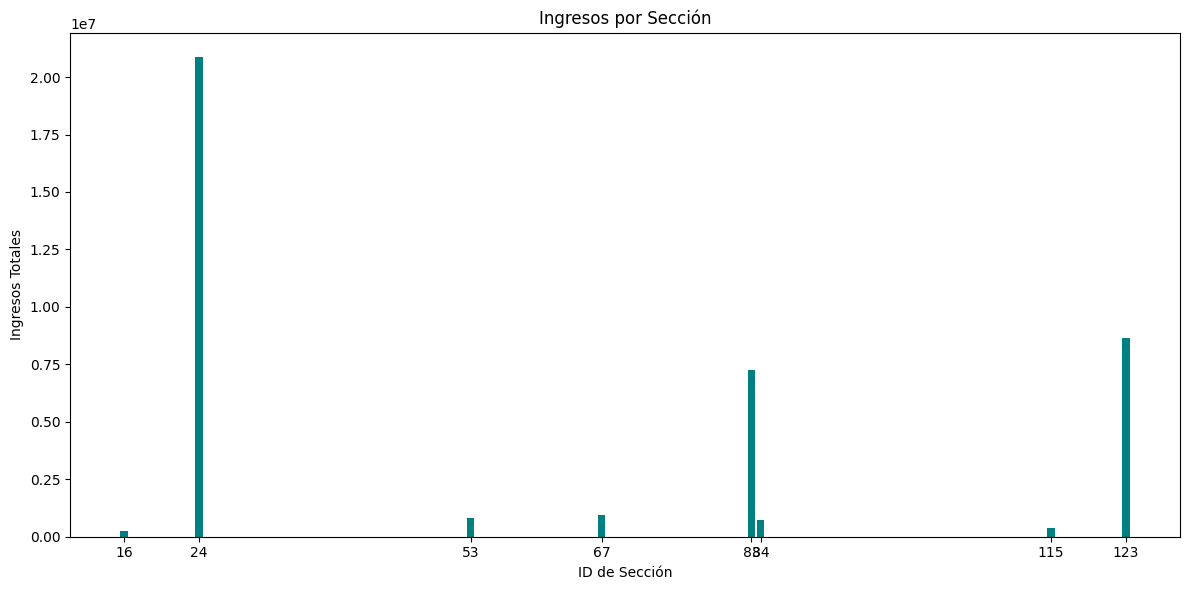

In [38]:
plt.figure(figsize=(12, 6))

# Ordenar los resultados de mayor a menor para mejor visualización
resultados_ordenados = dict(sorted(resultados.items(), key=lambda item: item[1], reverse=True))

plt.bar(list(resultados_ordenados.keys()), list(resultados_ordenados.values()), color='teal')
plt.title('Ingresos por Sección')
plt.xlabel('ID de Sección')
plt.ylabel('Ingresos Totales')
plt.xticks(list(resultados_ordenados.keys()))
plt.tight_layout()
plt.show()

Pregunta 5: ¿Cuáles son los 10 productos más vendidos en cantidad?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

top_productos = pd.read_sql_query("""
    SELECT nombre_producto, SUM(cantidad) AS total_vendido 
    FROM tickets 
    GROUP BY nombre_producto 
    ORDER BY total_vendido DESC 
    LIMIT 10
""", conexion)

print(top_productos)

conexion.close()

GRÁFICOS

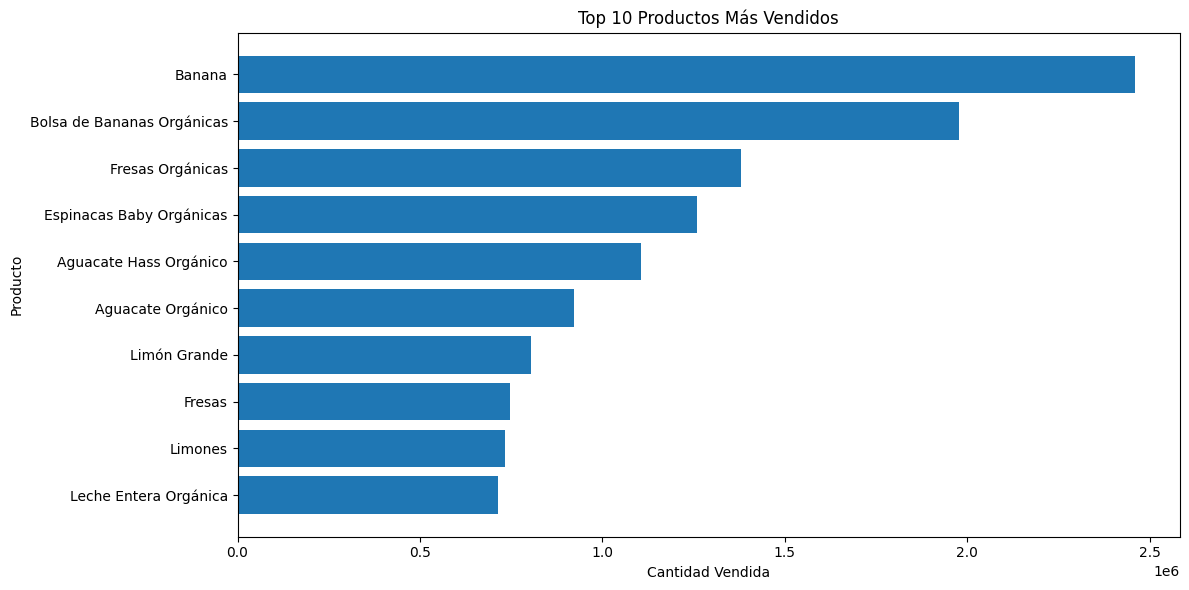

In [43]:
# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 6))
plt.barh(top_productos['nombre_producto'], top_productos['total_vendido'])

# Invertir el orden para que el producto más vendido aparezca arriba
plt.gca().invert_yaxis()

# Añadir etiquetas y título
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Pregunta 6: ¿Qué 10 productos generan más ingresos?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

top_productos = pd.read_sql_query("""
    SELECT nombre_producto, SUM(precio_total) AS total_generado
    FROM tickets 
    GROUP BY nombre_producto 
    ORDER BY total_generado DESC 
    LIMIT 10
""", conexion)

print(top_productos)

conexion.close()

GRÁFICOS

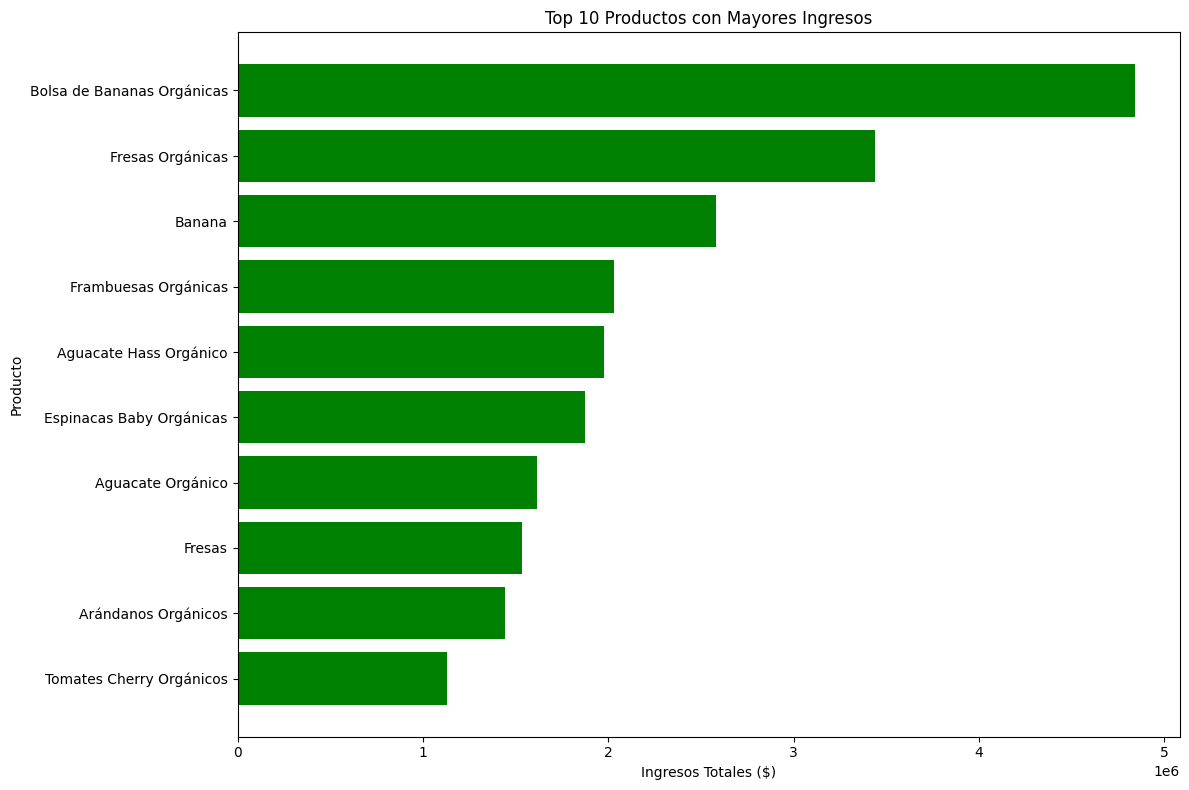

In [48]:
# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(top_productos['nombre_producto'], top_productos['total_generado'], color='green')

# Invertir el orden para que el producto más vendido aparezca arriba
plt.gca().invert_yaxis()

# Añadir etiquetas y título
plt.title('Top 10 Productos con Mayores Ingresos')
plt.xlabel('Ingresos Totales ($)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Pregunta 7: ¿Quiénes son los 20 clientes que más compran en términos de ingresos?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

top_clientes = pd.read_sql_query("""
    SELECT id_cliente, SUM(precio_total) AS clientes_compras 
    FROM tickets 
    GROUP BY id_cliente 
    ORDER BY clientes_compras DESC 
    LIMIT 20
""", conexion)

print(top_clientes)

conexion.close()

GRÁFICOS

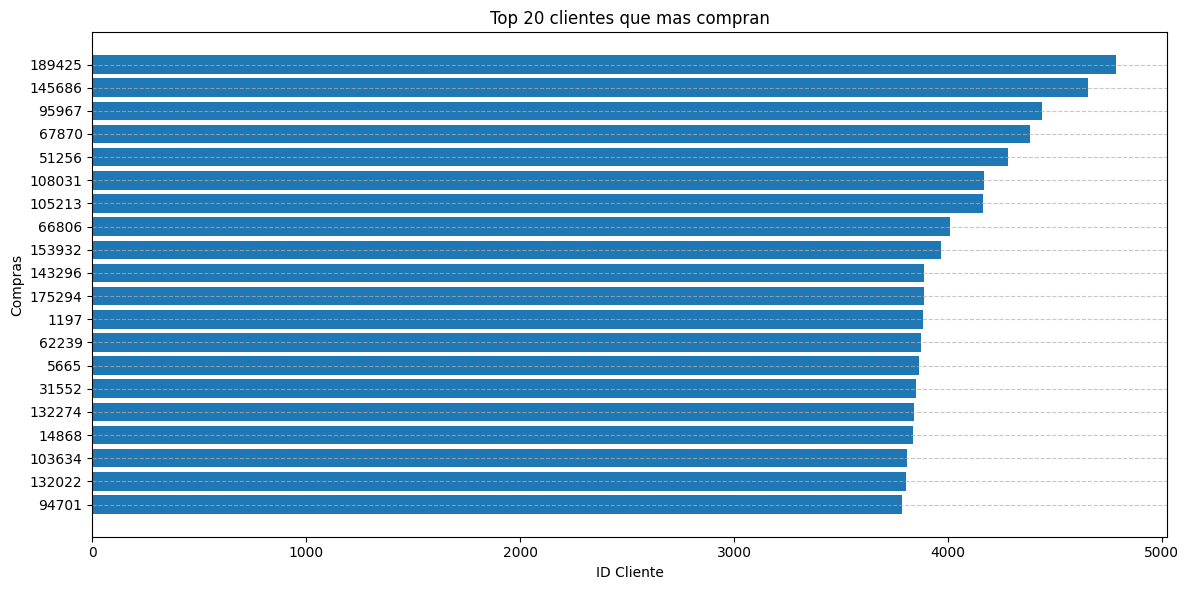

In [ ]:
# Crear gráfico de barras horizontales
plt.figure(figsize=(12, 6))
plt.barh(top_clientes['id_cliente'].astype(str), top_clientes['clientes_compras'])

# Invertir el orden para que el producto más vendido aparezca arriba
plt.gca().invert_yaxis()

# Añadir etiquetas y título
plt.title('Top 20 clientes que mas compran')
plt.xlabel('ID Cliente')
plt.ylabel('Compras')
plt.tight_layout()
plt.show()

Pregunta 8: ¿Cuál es la compra media por cliente?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

compra_media = pd.read_sql_query("""
    SELECT AVG(media_cliente) as compra_media 
    FROM (
        SELECT id_cliente, SUM(precio_total) AS media_cliente 
        FROM tickets 
        GROUP BY id_cliente
    )
""", conexion)

print("Compra media por cliente:", compra_media['compra_media'][0])

conexion.close()

Pregunta 9: ¿Cuántos pedidos totales se han realizado?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

total_pedidos = pd.read_sql_query("""
    SELECT COUNT(DISTINCT id_pedido) AS total_pedidos FROM tickets;
""", conexion)

print("Total de pedidos realizados:", total_pedidos['total_pedidos'][0])

conexion.close()

Pregunta 10: ¿Cuál es el valor promedio por pedido?

In [ ]:
conexion = sqlite3.connect("./data/sanoyfresco.db")

valor_promedio_pedido = pd.read_sql_query("""
    SELECT (SUM(precio_total) * 1.0) / COUNT(DISTINCT id_pedido) AS valor_promedio_pedido 
    FROM tickets;
""", conexion)

print("Valor promedio por pedido:", valor_promedio_pedido['valor_promedio_pedido'][0])

conexion.close()